In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import  f1_score, confusion_matrix, roc_auc_score, plot_roc_curve

## Importando el Dataset

In [2]:
data = pd.read_csv("creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Dimensiones del dataset

In [3]:
data.shape

(284807, 31)

### ¿Hay NA's en el dataset?

In [4]:
nulls = pd.DataFrame(data.isna().sum())
nulls

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


### Observando la matriz de correlaciones


<AxesSubplot:>

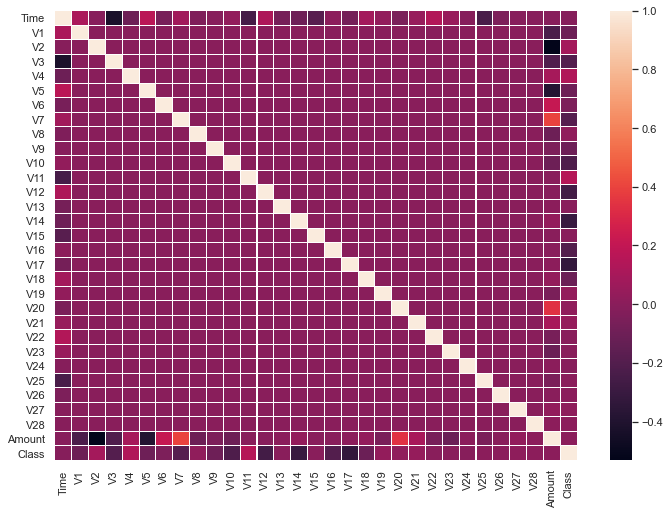

In [5]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

corr_mat = data.corr()
sns.heatmap(corr_mat, fmt="d", linewidths=".1")


### Distribución de los Fraudes vs No Fraudes

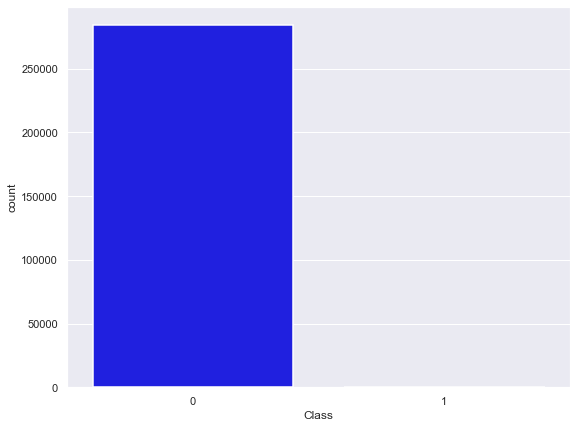

In [6]:
sns.set(rc={'figure.figsize':(9,7)})
sns.countplot(x='Class', data=data, palette=["blue","red"], linewidth = 1.5)
plt.show()

#### Dataset desbalanceado. Donde la clase 1 : Fraude, es mínima a comparación de la clase 0 : No fraude

## Escalando las variables que faltan

In [7]:
scaler = StandardScaler()
variables = ["Time", "Amount"]
a_escalar = data[variables]
a_escalar = pd.DataFrame(scaler.fit_transform(a_escalar), columns=variables)
data.drop(variables, axis = 1 , inplace=True)

In [8]:
data["Time"] = a_escalar["Time"]
data["Amount"] = a_escalar["Amount"]

In [9]:
data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Time,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,-1.996583,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-1.996583,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,-1.996562,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,-1.996562,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-1.996541,-0.073403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0,1.641931,-0.350151
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0,1.641952,-0.254117
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0,1.641974,-0.081839
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,0,1.641974,-0.313249


### Separando dataset en X,y

In [10]:
target = "Class"
cols = [x for x in data.columns if x != target]
X = data[cols]
y = data[target]

### Separando en x_train, x_test, y_train, y_test

In [11]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= .2, shuffle=True, random_state=42)

### Oversampling con SMOTE

In [12]:
ovs = SMOTE()
x_train , y_train = ovs.fit_resample(x_train,y_train)

In [13]:
y_train.value_counts()

0    227451
1    227451
Name: Class, dtype: int64

In [14]:
x_train.shape

(454902, 30)

Text(0.5, 1.0, '0: No fraude, 1: Fraude')

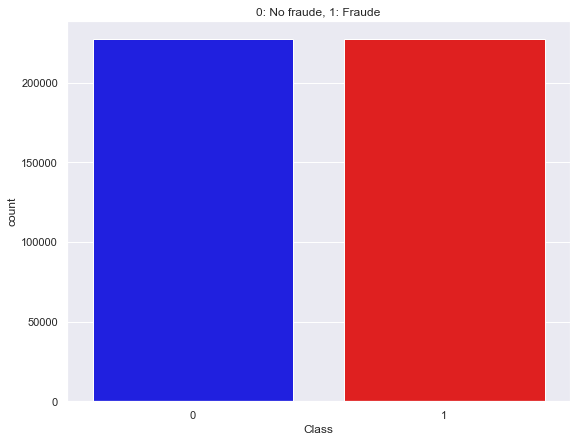

In [15]:
sns.countplot(x = y_train, palette=["blue","red"])
plt.title("0: No fraude, 1: Fraude")

### Regresión Logística

In [16]:
# usar liblinear, lfbgs no converge con datasets grandes.
params = {"C":np.logspace(-3,3,7)}
logreg = LogisticRegression(solver="liblinear")
logreg_cv = GridSearchCV(logreg, param_grid= params, cv = 3, n_jobs=-1)
logreg_cv.fit(x_train,y_train.ravel())

GridSearchCV(cv=3, estimator=LogisticRegression(solver='liblinear'), n_jobs=-1,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])})

In [17]:
print("Accuracy:", logreg_cv.best_score_)
print("Accuracy:", logreg_cv.best_params_)

Accuracy: 0.9488307371697641
Accuracy: {'C': 10.0}


In [18]:
preds = logreg_cv.predict(x_test)
print("ROC AUC: ",roc_auc_score(preds,y_test))
print("F1 SCORE: ",f1_score(preds,y_test))

ROC AUC:  0.5299897179539323
F1 SCORE:  0.11290322580645161


### XGBoost

In [22]:
xgb = XGBClassifier(label_encoder = False, eval_metric = "logloss").fit(x_train,y_train)

[15:41:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [27]:
preds2 = xgb.predict(x_test)
print("AUC ROC: ", roc_auc_score(preds2,y_test))
print("f1 score", f1_score(preds2, y_test))

AUC ROC:  0.885197976368155
f1 score 0.8115942028985508
